In [32]:
import pandas as pd
import numpy as np
import re, csv


targetSentiment = ["positive", "negative","neutral"]

df = pd.read_csv('BalancedUncleanFile.csv')

In [33]:
# FEATURE EXTRACTION
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['punctuation'] = df['text'].apply(lambda x: len([x for x in re.split('(\W)', x) if x == '!' ])) #PUNCTUATION
df[['upper','hastags']].head()

,upper,hastags
0,2,1
1,2,0
2,0,0
3,1,4
4,0,0


In [34]:
#Data Preprocessing
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

#Lower Case 
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

# #PUNCTUATION REMOVAL
# df['text'] = df['text'].str.replace('[^\w\s]','')

#StopWord REMOVAL
df['stopwords'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopWords)) 
# df[['stopwords','hastags']].head()

# Common Words Removal
freq_CommonWord = pd.Series(' '.join(df['text']).split()).value_counts()[:11]
# print(freq_CommonWord)
freq_CommonWord = list(freq_CommonWord.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_CommonWord))

# Rare Words Removal
freq_RareWord = pd.Series(' '.join(df['text']).split()).value_counts()[-60:]
freq_RareWord = list(freq_RareWord.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_RareWord))

# Lemmatization
from textblob import Word
# df = df[df['text'].notnull()]   for removinf split float error due to null or empty row
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()


0    yes #lhrt2 lounge is fantastic, if only u one ...
1    good note, 2 employee encountered @ newark wer...
2     great flight! great view! http://t.co/aufm4xdaj2
3    flt 3867 crew #orangecounty #denver is #best! ...
4          thank you. been trying two day set this up.
Name: text, dtype: object

In [ ]:
#Spelling Correction
from textblob import TextBlob
df = df[df['text'].notnull()] 
df['text'] = df['text'].apply(lambda x: str(TextBlob(x).correct()))
print('done')

In [35]:
df['sentimentScore_TextBlob'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0] )
# df[['text','sentimentScore_TextBlob']].head()


In [36]:
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

df['sentimentScore_Vader'] = df['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df.head()

# print(df.shape)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,...,tweet_created,tweet_location,user_timezone,punctuation,hashtag,hastags,upper,stopwords,sentimentScore_TextBlob,sentimentScore_Vader
0,3625,3625,3625,568228124263124992,positive,1.0,NaN,NaN,United,NaN,...,2015-02-18 17:58:36 -0800,New York,Eastern Time (US & Canada),1,['#LHRT2'],1,2,"@united yes #lhrt2 lounge fantastic, us ones c...",0.133333,0.7644
1,4241,4241,4241,567760060080599040,positive,1.0,NaN,NaN,United,NaN,...,2015-02-17 10:58:41 -0800,"Plattsburgh, New York",Quito,3,[],0,2,"@united good note, 2 employees encountered @ n...",0.112760,0.8007
2,5407,5407,5407,569134718396051456,positive,1.0,NaN,NaN,Southwest,NaN,...,2015-02-21 06:01:05 -0800,Den10,Central Time (US & Canada),2,[],0,0,@southwestair great flight! great view! http:/...,1.000000,0.8684
3,5374,5374,5374,569160924960919552,positive,1.0,NaN,NaN,Southwest,NaN,...,2015-02-21 07:45:13 -0800,"Los Angeles, California",Pacific Time (US & Canada),2,"['#OrangeCounty', '#Denver', '#BEST', '#luv']",4,1,@southwestair flt 3867 crew #orangecounty #den...,1.000000,-0.3036
4,716,716,716,570142263290011649,positive,1.0,NaN,NaN,United,NaN,...,2015-02-24 00:44:42 -0800,NaN,NaN,0,[],0,0,@united thank you. trying two days set up.,0.000000,0.3612


SVC
Accuracy: 64.4570%
DecisionTreeClassifier
Accuracy: 59.1443%
RandomForestClassifier
Accuracy: 62.9055%
LogisticRegression
Accuracy: 58.4391%


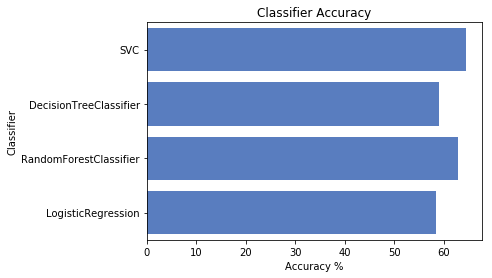

In [70]:

from sklearn.model_selection import train_test_split
# x = df.loc[:,['text', 'sentimentScore_TextBlob']]
# x = df.loc[:,['text','upper', 'hastags', 'punctuation']]
#with hashtag the accuracy decreases by 1%
x = df.loc[:,['sentimentScore_Vader', 'sentimentScore_TextBlob', 'upper', 'punctuation', 'hastags']]
y = df.loc[:,['airline_sentiment']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size =0.30)
classifiers(X_train, Y_train.values.ravel(), X_test,Y_test)

In [71]:
# df.to_csv('FinalClean.csv')
# print('done')
X_train['airline_sentiment'] = Y_train['airline_sentiment']
X_test['airline_sentiment'] = Y_test['airline_sentiment']

X_train.to_csv('64PercentSVC_Training.csv')
X_test.to_csv('64PercentSVC_Test.csv')

# df.columns

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
# Splitting DataSet for Training and Testing

from sklearn.model_selection import train_test_split

x = df.loc[:,['text', 'upper', 'hastags', 'punctuation']]
y = df.loc[:,['airline_sentiment']]


X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size =0.30)
print('Splitting Data complete')


print('X_train:',X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:',X_test.shape)

Splitting Data complete
X_train: (4962, 4)
Y_train: (4962, 1)
X_test: (2127, 4)


In [ ]:
#TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3))

X_train_vector = tfidfVectorizer.fit_transform(X_train['text'])
X_test_vector = tfidfVectorizer.transform(X_test['text'])
print('X_train_vector:',X_train_vector.shape)
print('X_test_vector:', X_test_vector.shape)


In [ ]:
classifiers(X_train_vector, Y_train.values.ravel(), X_test_vector,Y_test)

In [40]:
#All Classifiers
def classifiers(X_train, Y_train, X_test,Y_test):

    from sklearn.naive_bayes import MultinomialNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    from sklearn import metrics
    from sklearn.metrics import accuracy_score, log_loss
    from sklearn.svm import SVC
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # import warnings filter
    from warnings import simplefilter
    simplefilter(action='ignore', category=FutureWarning)
    
    accList =[]
    clfNameList = []
    

    classifiers = [
#         MultinomialNB(), #doesnt work for negative values
        SVC(kernel="linear"),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(random_state=0)
    ]

    evaluationArr =["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=evaluationArr)

    for clf in classifiers:
        clf.fit(X_train, Y_train)
        clfName = clf.__class__.__name__
        print(clfName)
        clfNameList.append(clfName)

        predicted = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predicted)
        print("Accuracy: {:.4%}".format(accuracy))
        accList.append(accuracy)
#         print(metrics.classification_report(Y_test, predicted, targetSentiment))
        print("="*30)

    #     train_predictions = clf.predict_proba(X_test)[:,3]
    #     ll = log_loss(Y_test, train_predictions)
    #     print("Log Loss: {}".format(ll))

        modelResult = pd.DataFrame([[clfName, accuracy*100]], columns=evaluationArr)
        log = log.append(modelResult)
        
    

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()